In [93]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('D:\Machine Learning\ADP-master\data/bikeshare.csv')

# type별로 컬럼 분류
col_id = []
col_dt = ['datetime']
col_cat = ['season']
col_int = ['weather', 'humidity','casual','registered','count']
col_float = ['temp','atemp','windspeed']
col_bool = ['holiday','workingday']

col_num = col_int + col_float
data['datetime'] = pd.to_datetime(data['datetime'])
data[col_cat]= data[col_cat].astype('str')
data[col_int] = data[col_int].astype('int', errors='ignore')
data[col_float] = data[col_float].astype('float')

data.head()
X_data=data[['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']]
Y_data=data[['count']]                                 # 참고 : X_data=DF.drop(['종속변수'].axis=1, inplace=False)

In [94]:
X_data.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,0,0,1,9.84,14.395,81,0.0,3,13
1,0,0,1,9.02,13.635,80,0.0,8,32
2,0,0,1,9.02,13.635,80,0.0,5,27
3,0,0,1,9.84,14.395,75,0.0,3,10
4,0,0,1,9.84,14.395,75,0.0,0,1


In [95]:
Y_data.head()

,count
0,16
1,40
2,32
3,13
4,1


## 회귀모델 성능 평가

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [ ]:
r2 = r2_score(y_test, y_preds) # R2 : 0~1, 1에 가까울수록 설명력이 높은 것, 음수가 나오는 경우도 있는데, 그건 망한 거.
mae = mean_absolute_error(true, pred)
mse = mean_squared_error(y_test, y_preds) # MSE : 낮을 수록 좋겠지
rmse = np.sqrt(mse) # RMSE : 얘도 당연히 낮을 수록 좋겠지
def rmsle(y, pred): # RMSLE : 얘도 당연히 낮을 수록 좋겠지
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def mape(y_test, y_preds): 
    y_test, y_preds = np.array(y_test), np.array(y_preds)
    return np.mean(np.abs((y_test - y_preds) / y_test)) * 100

#cross-validation시
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5) # Negative MSE
rmse_scores  = np.sqrt(-1 * neg_mse_scores) # RMSE
avg_rmse = np.mean(rmse_scores) # RMSE 평균

## 모델링

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_data, Y_data, test_size=0.3, random_state=0)

In [98]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #랜덤포레스트회귀, GBM회귀
from sklearn.tree import DecisionTreeRegressor #의사결정트리 회귀
from xgboost import XGBRegressor #XGB회귀
from lightgbm import LGBMRegressor #LGB회귀

### LinearRegression
 - 단순회귀분석 
 - 다중회귀분석 : 교호작용 고려하지 않을 때, 교호작용 고려할 때
 - 다항회귀분석(선형X)
 
 -- degree2 : [1,x1, x2, x1^2, x1x2, x2^2]
 -- degree3 : [1, x1.x2, x1^2, x1x2, x2^2, x1^3, x1^2x2, x1x2^2, x1^3]

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X1=data['humidity'].values.reshape(-1,1) #단순회귀분석
X2=data[['humidity', 'registered']] #다중회귀분석(교호X)
poly_d1=PolynomialFeatures(degree=2, interaction_only=True) #다중회귀분석(교호)
X3=poly_d1.fit_transform(data[['humidity', 'registered']])
poly=PolynomialFeatures(degree=3) #다항회귀분석
X4=poly.fit_transform(data[['humidity', 'registered']])

Y=data['count']

model_1=LinearRegression() #단순회귀분석
model_1.fit(X1, Y)
model_2=LinearRegression() #다중회귀분석: 교호X
model_2.fit(X2, Y)
model_3=LinearRegression() #다중회귀분석: 교호O
model_3.fit(X3, Y3)
model_4=LinearRegression() #다항회귀분석
model_4.fit(X4, Y4)
model_5=LinearRegression() #다중회귀분석(train)
model_5.fit(X_train, y_train)

y_preds=model_5.predict(X_test) #다중회귀분석(test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('단순회귀분석의 R2:', model_1.score(X1, Y))
print('단순회귀분석의 회귀계수:', model_1.coef_)
print('단순회귀분석의 절편:', model_1.intercept_)
print('단순회귀분석 예측 결과:',model_1.predict(np.array([80, 70,100]).reshape(-1,1)))
print('다중회귀분석(교호X)의 R2:', model_2.score(X2, Y))
print('다중회귀분석(교호X)의 회귀계수:', model_2.coef_)
print('다중회귀분석(교호X)의 절편:', model_2.intercept_)
print('다중회귀분석(교호x)의 예측결과:',model_2.predict(np.array([[3,5]])))
print('다중회귀분석(교호O)의 R2:', model_3.score(X3, Y3))
print('다중회귀분석(교호O)의 회귀계수:', model_3.coef_)
print('다중회귀분석(교호O)의 절편:', model_3.intercept_)
print('다중회귀분석(교호O)의 예측결과:',model_3.predict(np.array([[1,3,5,15]])))
print('다항회귀분석의 R2:', model_4.score(X4, Y4))
print('다항회귀분석의 회귀계수:', model_4.coef_)
print('다항회귀분석의 절편:', model_4.intercept_)
print('다항회귀분석의 예측결과:',model_4.predict(np.array([[1,3,5,15,3,2,1,6,8,10]])))

print('다중회귀분석의 MSE:{0:.3f}, RSMED:{1:.3f}, Variance score: {2:.3f}'.format(mse, rmse, r2_score(y_test, y_preds)))
print('다중회귀분석의 절편값:', model_5.intercept_)
print('다중회귀분석의 회귀계수값:', np.round(model_5.coef_,1))

#coeff=pd.Series(data=np.round(model_5.coef_,1), index=X_data.columns)
#coeff.sort_values(ascending=False)

단순회귀분석의 R2: 0.10072465560431654
단순회귀분석의 회귀계수: [-2.98726858]
단순회귀분석의 절편: 376.4456083303636
단순회귀분석 예측 결과: [137.46412205 167.33680783  77.71875048]
다중회귀분석(교호X)의 R2: 0.9465649654278583
다중회귀분석(교호X)의 회귀계수: [-0.60377511  1.14405745]
다중회귀분석(교호X)의 절편: 50.97900881101202
다중회귀분석(교호x)의 예측결과: [54.88797073]
다중회귀분석(교호O)의 R2: 0.9481622901657941
다중회귀분석(교호O)의 회귀계수: [ 0.         -0.22259444  1.300017   -0.00263385]
다중회귀분석(교호O)의 절편: 26.452073831678064
다중회귀분석(교호O)의 예측결과: [32.2448677]
다항회귀분석의 R2: 0.9554554681038671
다항회귀분석의 회귀계수: [ 0.00000000e+00 -9.42040662e-01  2.01592665e+00  3.04307286e-02
 -9.26852759e-03 -1.38496298e-03 -1.93720857e-04  7.83011864e-06
  8.14860843e-06  4.82586262e-07]
다항회귀분석의 절편: -20.39435424952316
다항회귀분석의 예측결과: [-12.7150343]
다중회귀분석의 MSE:0.000, RSMED:0.000, Variance score: 1.000
다중회귀분석의 절편값: [-2.84217094e-14]
다중회귀분석의 회귀계수값: [[-0.  0. -0. -0.  0. -0. -0.  1.  1.]]


### RandomForest, GBM, DecisionTree, XGB, LGB Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #랜덤포레스트회귀, GBM회귀
from sklearn.tree import DecisionTreeRegressor #의사결정회귀
from xgboost import XGBRegressor #XGB회귀
from lightgbm import LGBMRegressor #LGB회귀
from sklearn.model_selection import cross_val_score

rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=1000)
dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

dt_reg.fit(X_train,y_train)
rf_reg.fit(X_train,y_train)
gb_reg.fit(X_train,y_train)
xgb_reg.fit(X_train,y_train)
lgb_reg.fit(X_train,y_train)

y_preds_dt=dt_reg.predict(X_test)
y_preds_rf=rf_reg.predict(X_test)
y_preds_gb=gb_reg.predict(X_test)
y_preds_xgb=xgb_reg.predict(X_test)
y_preds_lgb=lgb_reg.predict(X_test)

print(y_preds_dt, round(2))
print(y_preds_rf, round(2))
print(y_preds_gb, round(2))
print(y_preds_xgb, round(2))
print(y_preds_lgb, round(2))

[197.57608696 287.27023945 287.27023945 ...  62.29659643  62.29659643
 197.57608696] 2
[243.014 238.31  228.897 ...  73.925  62.022 173.066] 2
[238.69123899 240.20312116 228.62529738 ...  74.1916809   61.93211022
 173.17783365] 2
[242.04823  239.3691   229.64894  ...  74.458786  62.265854 172.03476 ] 2
[241.18641452 237.97033808 228.98537474 ...  74.02694369  61.45814683
 172.66099847] 2


### cross_val_score

In [101]:
def get_model_cv_prediction(model, X, Y):
    neg_mse_scores=cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print('####', model.__class__.__name__, '####')
    print('5교차검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

X=X_data
Y=data['count']    
models=[lr_reg, rf_reg, gb_reg, dt_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X, Y)

#### LinearRegression ####
5교차검증의 평균 RMSE: 0.000
#### RandomForestRegressor ####
5교차검증의 평균 RMSE: 4.651
#### GradientBoostingRegressor ####
5교차검증의 평균 RMSE: 3.290
#### DecisionTreeRegressor ####
5교차검증의 평균 RMSE: 35.860
#### XGBRegressor ####
5교차검증의 평균 RMSE: 4.247
#### LGBMRegressor ####
5교차검증의 평균 RMSE: 5.171


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import corss_val_score
ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge, X_data, y_data, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

alphas=[0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    neg_mse_scores=cross_val_score(ridge, X_data, y_data, scoring='neg_mean_squared_error'm cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha{0}일 때 5folds의 평균 rmse: {1:.3f}'.format(alpha.avg_rmse))
    



# 시각화

<AxesSubplot:>

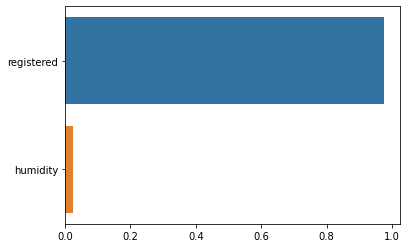

In [58]:
#RandomForest의 Feature Importance 시각화
import seaborn as sns
%matplotlib inline
rf_reg=RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X,Y)
feature_series=pd.Series(data=rf_reg.feature_importances_, index=X.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)